In [1]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")



C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [4]:
# Code starts here
# Code starts here
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(120000, 13)


,Unnamed: 0,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,43223,43224,0,0.000000,35,1,0.839193,6000.0,14,0,2,0,2.0
1,76339,76340,0,0.151166,30,0,0.941212,5000.0,12,0,2,0,0.0
2,104413,104414,1,1.149154,29,0,0.195402,2000.0,10,1,0,0,0.0
3,66195,66196,0,0.308043,36,0,0.853733,6200.0,11,0,2,0,0.0
4,141706,141707,0,0.070246,62,0,35.000000,NaN,8,0,0,0,0.0


In [8]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(30000, 12)


,Unnamed: 0,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,108655,108656,0.219007,42,0,0.481043,12000.0,11,0,5,0,2.0
1,143812,143813,0.347880,34,0,0.027036,6250.0,6,0,0,0,2.0
2,65001,65002,0.514498,30,0,0.068629,6250.0,3,0,0,0,0.0
3,148708,148709,0.375009,28,0,0.159952,6626.0,4,0,0,0,1.0
4,128843,128844,0.182710,50,0,0.028994,5000.0,15,0,0,0,0.0


In [9]:
print(train.nunique())
print(test.nunique())

Unnamed: 0                              120000
Id                                      120000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    100933
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        15
DebtRatio                                93154
MonthlyIncome                            12633
NumberOfOpenCreditLinesAndLoans             57
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                26
NumberOfTime60-89DaysPastDueNotWorse        12
NumberOfDependents                          13
dtype: int64
Unnamed: 0                              30000
Id                                      30000
RevolvingUtilizationOfUnsecuredLines    25750
age                                        77
NumberOfTime30-59DaysPastDueNotWorse       14
DebtRatio                               25865
MonthlyIncome                            6618
NumberOfOpenCreditLinesAndLoans            47
NumberOf

In [10]:
y= train['SeriousDlqin2yrs']
train.drop(['Id','Unnamed: 0','SeriousDlqin2yrs'],1,inplace=True)

In [11]:
Id= test['Unnamed: 0'].copy()
test.drop(['Id','Unnamed: 0'],1,inplace=True)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.219007,42,0,0.481043,12000.0,11,0,5,0,2.0
1,0.347880,34,0,0.027036,6250.0,6,0,0,0,2.0
2,0.514498,30,0,0.068629,6250.0,3,0,0,0,0.0
3,0.375009,28,0,0.159952,6626.0,4,0,0,0,1.0
4,0.182710,50,0,0.028994,5000.0,15,0,0,0,0.0


In [16]:
train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           23756
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3123
dtype: int64

In [17]:
test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           5975
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       801
dtype: int64

In [13]:
print(train['NumberOfDependents'].value_counts())
print(test['NumberOfDependents'].value_counts())

0.0     69561
1.0     21077
2.0     15595
3.0      7564
4.0      2285
5.0       596
6.0       127
7.0        41
8.0        20
10.0        5
9.0         4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64
0.0    17341
1.0     5239
2.0     3927
3.0     1919
4.0      577
5.0      150
6.0       31
7.0       10
8.0        4
9.0        1
Name: NumberOfDependents, dtype: int64


In [23]:
from sklearn.impute import SimpleImputer

In [24]:
# to treat missing values

def treat_null_values(df, df1,column, method):
    imputer = SimpleImputer(missing_values=np.nan, strategy=method)
    imputer= imputer.fit(df[[column]])
    new_df= imputer.transform(df[[column]])
    new_df1= imputer.transform(df1[[column]])
    return pd.DataFrame(new_df), pd.DataFrame(new_df1)   

In [25]:
train['NumberOfDependents'],test['NumberOfDependents']= treat_null_values(train,test,'NumberOfDependents','most_frequent')

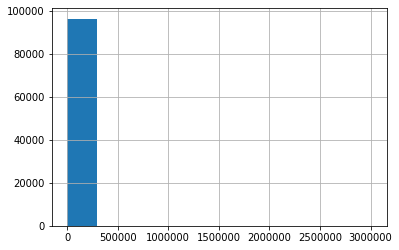

In [28]:
train['MonthlyIncome'].hist()

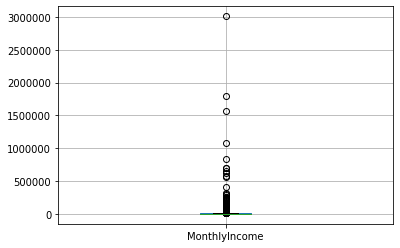

In [31]:
train.boxplot(['MonthlyIncome'])

In [32]:
train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120000.000000,120000.00000,120000.000000,120000.000000,9.624400e+04,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,6.687750,52.29220,0.419825,350.676963,6.682793e+03,8.456342,0.264433,1.018883,0.238208,0.736725
std,266.893071,14.77082,4.171608,1887.417176,1.545053e+04,5.149796,4.148088,1.124316,4.134022,1.107236
min,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029959,41.00000,0.000000,0.175594,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.155152,52.00000,0.000000,0.366806,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.561464,63.00000,0.000000,0.868197,8.237250e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.00000,98.000000,329664.000000,3.008750e+06,57.000000,98.000000,32.000000,98.000000,20.000000


In [33]:
train['MonthlyIncome'],test['MonthlyIncome']= treat_null_values(train,test,'NumberOfDependents','mean')

In [34]:
print(train.isnull().sum())
print(test.isnull().sum())

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


### Visualize the data

- Plot a scatter plot for all the independent variables with the dependent variable
- Replace the missing values and modify some column values(as required by you).
- Clean the data, apply some data preprocessing and engineering techniques.

### Model building

- Predict the values after building a Machine learning model
- Apply some technique to deal with the imbalance dataset
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#Under Sampling
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
#Tomek Undersampling
from imblearn.under_sampling import TomekLinks
# SMOTE Over-sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [42]:
# Code Starts here


for n in [6]:
    X_train, X_test, y_train, y_test = train_test_split(train,y, random_state = 2, test_size = 0.15)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #poly = PolynomialFeatures(2)
    #X_train = poly.fit_transform(X_train)
    #X_test = poly.transform(X_test)
    
    #Initialising Random Forest Classifier with appropriate parameters
    clf = RandomForestClassifier(min_samples_split = n,random_state = 0, criterion = 'entropy')
    #clf = RandomForestClassifier(random_state=2,n_estimators=350,max_depth=35,max_features=10,min_samples_split=4)
    
    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)
    
    #Parameter grid
    #parameter_grid = {"max_depth": [2,3,None], "max_features": [1,3,10,11], "min_samples_leaf": [10,20,50], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}
    
    # Randomized search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= RandomizedSearchCV(estimator=clf_rlf,param_distributions=parameter_grid,n_iter=20,random_state=0)
    #clf.fit(X_train,y_train)
    
    # Grid Search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= GridSearchCV(estimator=clf_rlf, param_grid=parameter_grid)
    #clf.fit(X_train,y_train)
    
    #Initialising bagging with appropriate parameters
    #clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, random_state=0)
    
    #Initialising pasting with appropriate parameters
    #clf= BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=100,bootstrap=False,random_state=0)
    
    smote= SMOTE(random_state=0)
    X_sample3, y_sample3 = smote.fit_sample(X_train, y_train)
    clf.fit(X_sample3,y_sample3)
    
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print(roc_auc_score(y_test, y_pred))
    print("----------------------")


0.9906666666666667
0.9088333333333334
0.6628050068684774
----------------------


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [43]:
#### Run Model
test = scaler.transform(test)
#test = poly.transform(test)
pred= clf.predict(test)

In [48]:
submission = pd.DataFrame({'Id': Id, 'SeriousDlqin2yrs': pred})
submission

,Id,SeriousDlqin2yrs
0,108655,0
1,143812,0
2,65001,0
3,148708,0
4,128843,0
...,...,...
29995,64086,0
29996,10266,0
29997,113621,0
29998,78671,1


In [49]:
submission['SeriousDlqin2yrs'].value_counts()

0    27874
1     2126
Name: SeriousDlqin2yrs, dtype: int64

In [50]:
submission.to_csv('Second_Submission_RFC.csv', index = False)